In [ ]:
#Implementing Rnn for handwritten digit recognition

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

timesteps = x_train.shape[1]
input_dim = x_train.shape[2]

model = Sequential([
    SimpleRNN(units = 128, activation = 'relu', input_shape = (timesteps, input_dim)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test accuracy: {test_accuracy:.2f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6849 - loss: 0.9189 - val_accuracy: 0.9281 - val_loss: 0.2384
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9306 - loss: 0.2371 - val_accuracy: 0.9459 - val_loss: 0.1756
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9481 - loss: 0.1750 - val_accuracy: 0.9607 - val_loss: 0.1474
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9557 - loss: 0.1481 - val_accuracy: 0.9605 - val_loss: 0.1393
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9604 - loss: 0.1393 - val_accuracy: 0.9663 - val_loss: 0.1199
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9675 - loss: 0.1118 - val_accuracy: 0.9668 - val_loss: 0.1135
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9718 - loss: 0.1007 - val_accuracy: 0.9682 - val_loss: 0.1105
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9718 - loss: 0.1010 - v

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

timesteps = x_train.shape[1]  # 28
input_dim = x_train.shape[2]  # 28

# Build the LSTM model
model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(timesteps, input_dim)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (Increase epochs if needed)
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

# Preprocess the image (resize, normalize, reshape)
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels to match MNIST images
    img = np.array(img)  # Convert to numpy array

    # Normalize the image (scale the pixel values to [0, 1])
    img = img / 255.0

    # Check if the values are in the correct range
    print(f"Image min: {img.min()}, max: {img.max()}")  # Should be in the range [0, 1]

    # Reshape the image to (1, 28, 28), the shape the LSTM model expects
    img = img.reshape(1, 28, 28)

    # Visualize the image (for debugging)
    plt.imshow(img[0], cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()

    return img

# Function to predict the digit from an image
def predict_digit(image_path):
    # Preprocess the image
    new_image = preprocess_image(image_path)

    # Predict the digit
    prediction = model.predict(new_image)

    # Get the predicted digit
    predicted_digit = np.argmax(prediction)
    print(f"The model predicts that the digit is: {predicted_digit}")

# Test the prediction function with an image
# predict_digit('path_to_your_image.jpg')


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6330 - loss: 1.0861 - val_accuracy: 0.9438 - val_loss: 0.1815
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9468 - loss: 0.1688 - val_accuracy: 0.9659 - val_loss: 0.1137
Epoch 3/10
595/750 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9637 - loss: 0.1142

KeyboardInterrupt: 

Image min: 0.0, max: 1.0


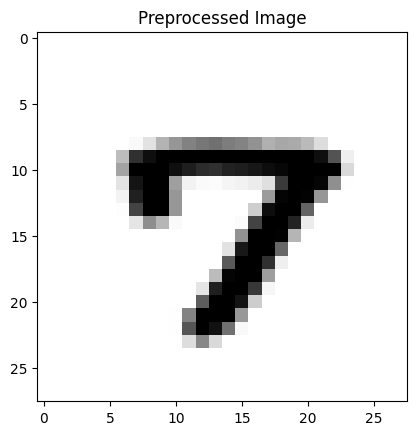

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
The model predicts that the digit is: 7


In [10]:
image_path = '/content/7.jpeg'  # Replace with your image path
predict_digit(image_path)